In [1]:
#Load data manipulation package
import numpy as np
import pandas as pd

#Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

#Data dumb store
import joblib

# 1. Business Understanding
---

- Knowing customer churn is essential for internet provider company for effectively prevent them using appropriate marketing initiative
- Internet provider company wants to give specific marketing initiative for preventing customer churn

## 1.2 Business Questions
---

- How can internet provider company develop marketing effectiveness strategy to increase reduce 30% of churn?
- What marketing initiatives are suitable to reduce the 30% customer churn?
- How to prevent unnecessary budget allocation?

## 1.3 Modelling Task
---

- Output target: **customer status of churn (categorical)**


- The goal of this project is to predict whether a customer will churn or not based on various features.
Task: **Classification task**


- We need a model that can be easily interpreted so that we can understand how each feature contributes to the prediction. This can help us gain insights into the underlying factors that influence whether a customer will churn or not.
Model used: **Logistic regression**


- We will use ROC/AUC as our evaluation metric since we want it's not influeced by imbalance target and we need to measure threshold using ROC/AUC. **Evaluation metric: ROC/AUC**

# 2. Modelling Workflow
---

## **Machine Learning Workflow** (Simplified)

### 1. <font color='blue'> Importing Data to Python:
    * Data description, Importing data, Data splitting
    
### 2. <font color='blue'> Exploratory Data Analysis:
    *Descriptive statistic, Missing value checking, Data exploration
    
### 3. <font color='blue'> Prepocessing:
    * Missing value handling, Outliers handling

### 4. <font color='blue'> Modelling:
    * Model fitting, Evaluation
    
### 5. <font color='blue'> Lift Chart & Interpretation:
    * Targetting customer churn, Coeficient interpretation

# 3. Load Data
---

- We want to describe our features and target feature
- Load the data from specific path

## 3.1 Data Description
---

The potential **predictors** for the response variable are:
1. `is_tv_subscriber`
 - `is_tv_subscriber = 0` for the customers who didn't subscribe to the TV package or only subscribe to the internet package.
  - `is_tv_subscriber = 1` for the customers who subscribe to the TV package.


2. `is_movie_package_subscriber`
  - `is_movie_package_subscriber = 0` for the customers who didn't subscribe to the movie package or only subscribe to the internet package.
  - `is_movie_package_subscriber = 1` for the customers who subscribe to the movie package.


3. `subscription_age` is the years of customer using the internet service.
4. `bill_avg` is the last three months' bill average.
5. `remaining_contract` is the year remaining for the customer's subscription contract. If null, the customer hasn't had a contract.
6. `service_failure_count` is the number of calls to the Call Center for service failure for the last three months.
7. `download_avg` is the last three months internet usage in GB.
8. `upload_avg` is the last three months upload in GB.
9. `download_over_limit` is the count of the internet usage over the customer's limit.

**Target variable**:
- `churn`
  - `churn = 0` for the customers who retain.
  - `churn = 1` for the customers who cancel their subscription before the contract ends or the customers who didn't renew their subscription after the contract ended.

## 3.2 Importing Data
---

In [2]:
X_train = joblib.load("data/raw/X_train.pkl")
y_train = joblib.load("data/raw/y_train.pkl")
X_valid = joblib.load("data/raw/X_valid.pkl")
y_valid = joblib.load("data/raw/y_valid.pkl")
X_test  = joblib.load("data/raw/X_test.pkl")
y_test  = joblib.load("data/raw/y_test.pkl")

# 4. Data Preprocessing
---

In [3]:
# check training data dimension
print(f"Faetures dimension with {X_train.shape[0]}, rows and {X_train.shape[1]} columns")

Faetures dimension with 49086, rows and 10 columns


**EDA Summary**
- We need to hanlde outliers in 4 columns: ['bill_avg', 'upload_avg', 'download_avg', 'subscription_age']
- We need to drop missing vaules in : ['reamining_contract', 'download_avg', 'upload_avg']

## 4.1 Drop Unused Feature
---

In [4]:
X_train_dropid = X_train.drop('id', axis=1)

In [5]:
X_train_dropid.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
1254,0,0,3.71,13,NaN,2,0.0,0.0,0
64024,1,1,0.55,15,1.43,0,33.9,1.2,0
4931,1,0,4.44,20,NaN,0,16.6,1.1,0
25031,1,1,5.35,31,NaN,0,3.1,0.6,0
8610,0,0,1.05,22,NaN,0,0.0,0.0,0


## 4.2 Drop Missing Values
---

In [6]:
# function split input and output
def split_input_output(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data: <pandas dataframe>
          dataframe input

    target_column: <string>
                   output column name

    Return
    ------

    x: <pandas dataframe>
        input data

    y: <pandas dataframe>
       output data

    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [7]:
# crate function to drop missing values
def drop_missing_values(X, y):
    """
    Function to drop outliers by IQR

    Parameters
    ----------
    data : pandas DataFrame
        The sample data

    cols : list
        List of columns to clean

    Returns
    -------
    data_clean : pandas DataFrame
        The clean sample data
    """
    dataset = pd.concat([X,y], axis=1)
    
    dataset_clean = dataset.dropna()
    
    # split input output
    X_clean, y_clean = split_input_output(data = dataset_clean,
                                          target_column = 'churn')
    
    return X_clean, y_clean

In [8]:
# Check missing values
X_train_dropid.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             14333
service_failure_count              0
download_avg                     144
upload_avg                       144
download_over_limit                0
dtype: int64

In [9]:
X_train_clean, y_train_clean = drop_missing_values(X = X_train_dropid,
                                                   y = y_train)

In [10]:
# check missing values
X_train_clean.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
dtype: int64

## 4.3 Handle Outliers

we will handle outliers in these columns:
- bill_avg
- download_avg
- upload_avg
- subscription_age

In [11]:
def drop_outlier(x, y, cols):
    """
    Function to drop outliers by IQR

    Parameters
    ----------
    data : pandas DataFrame
        The sample data

    cols : list
        List of columns to clean

    Returns
    -------
    data_clean : pandas DataFrame
        The clean sample data
    """
    # Copy data
    data_clean = pd.concat([x,y], axis=1)

    # Iterate over columns
    for col in cols:
        # Find IQR
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5 * iqr  # upper bound
        lb = q1 - 1.5 * iqr  # lower bound

        # Filter data
        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    # split input output
    X_clean, y_clean = split_input_output(data = data_clean,
                                          target_column = 'churn')
    
    return X_clean, y_clean

In [12]:
X_train_clean, y_train_clean = drop_outlier(x = X_train_clean,
                                            y = y_train_clean,
                                            cols = ['bill_avg', 'upload_avg','download_avg','subscription_age'])

In [13]:
# check dimension
print(f"Number of rows in X : {X_train_clean.shape[0]}")
print(f"Number of rows in y : {y_train_clean.shape[0]}")

Number of rows in X : 28931
Number of rows in y : 28931


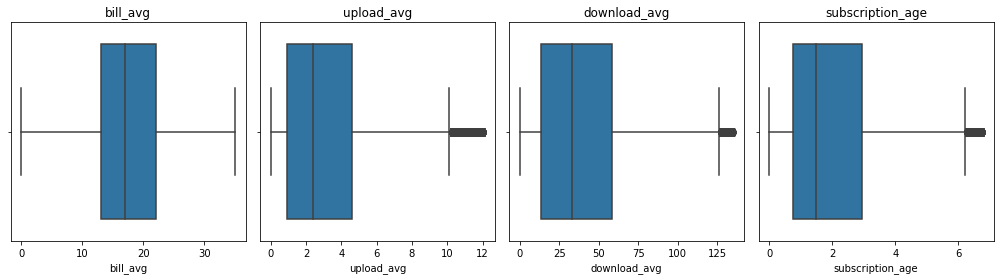

In [14]:
# Select the columns for boxplot
columns_to_plot = ['bill_avg', 'upload_avg','download_avg','subscription_age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

# Iterate over the columns and create boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=X_train_clean[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## 4.4 Create Preprocess Function
---

In [15]:
def preprocess(x, y):
    """
    Function to implement all preprocessing steps
    
    Parameter:
    ----------
    x : <pandas dataframe>
        raw predictors before cleaning
        
    y : <series>
        raw target variable
    
    Return:
    -------
    x_clean : <pandas dataframe>
              preprocessed predictors
        
    y_clean : <series>
              preprocessed target variable
    """
    
    # 1. drop unused feature (id)
    x_dropid = x.drop('id', axis=1)
    
    # 2. Drop missing values
    x_clean, y_clean = drop_missing_values(x_dropid, y)
    
    # we don't drop outliers here because test data is unseen
    
    return x_clean, y_clean

In [16]:
X_valid_clean, y_valid_clean = preprocess(x = X_valid, 
                                          y = y_valid)


X_test_clean, y_test_clean = preprocess(x = X_test, 
                                        y = y_test)

In [17]:
# save the data
joblib.dump(X_train_clean, "data/processed/X_train_clean.pkl")
joblib.dump(y_train_clean, "data/processed/y_train_clean.pkl")
joblib.dump(X_valid_clean, "data/processed/X_valid_clean.pkl")
joblib.dump(y_valid_clean, "data/processed/y_valid_clean.pkl")
joblib.dump(X_test_clean, "data/processed/X_test_clean.pkl")
joblib.dump(y_test_clean, "data/processed/y_test_clean.pkl")

['data/processed/y_test_clean.pkl']